Optimización usando el gradiente descendente (GD)
===

* 23:53 min | Ultima modificación: Marzo 29, 2021 | [YouTube](https://youtu.be/EBZ7x9nQk1Y)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

## Definición del problema

Encuentre el punto de mínima de la función de Rosenbrock:

$$f(x, y) = 100 \cdot (x^2 - y)^2 + (1 - x)^2$$

para: 

$$x \in [-2.048, 2.048]$$

$$y \in [-1.000, 4.000]$$ y $$f(1, 1) = 0$$.

In [2]:
def f(x, y):
    return 100 * (x ** 2 - y) ** 2 + (1 - x) ** 2

Se desea obtener una aproximación al punto de mínima local usando métodos numéricos. La dificultad de esta función permite que pueda ser utilizada para probar métodos numéricos de optimización.

## Forma de la superficie

La función de Rosenbrock se caracteriza por tener regiones de alta pendiente que rodean un valle casi plano en forma de banana en donde se encuentra ubicado el punto de mínima. Las técnicas basadas en el gradiente bajan rápidamente al valle, pero avanzan lentamente en dirección del mínimo una vez están en él, lo que dificulta el proceso de optimización. 

In [3]:
#
# Generación de un vector de puntos para x
#
X = np.linspace(start=-2.048, stop=2.048, num=100)
X

array([-2.048     , -2.00662626, -1.96525253, -1.92387879, -1.88250505,
       -1.84113131, -1.79975758, -1.75838384, -1.7170101 , -1.67563636,
       -1.63426263, -1.59288889, -1.55151515, -1.51014141, -1.46876768,
       -1.42739394, -1.3860202 , -1.34464646, -1.30327273, -1.26189899,
       -1.22052525, -1.17915152, -1.13777778, -1.09640404, -1.0550303 ,
       -1.01365657, -0.97228283, -0.93090909, -0.88953535, -0.84816162,
       -0.80678788, -0.76541414, -0.7240404 , -0.68266667, -0.64129293,
       -0.59991919, -0.55854545, -0.51717172, -0.47579798, -0.43442424,
       -0.39305051, -0.35167677, -0.31030303, -0.26892929, -0.22755556,
       -0.18618182, -0.14480808, -0.10343434, -0.06206061, -0.02068687,
        0.02068687,  0.06206061,  0.10343434,  0.14480808,  0.18618182,
        0.22755556,  0.26892929,  0.31030303,  0.35167677,  0.39305051,
        0.43442424,  0.47579798,  0.51717172,  0.55854545,  0.59991919,
        0.64129293,  0.68266667,  0.7240404 ,  0.76541414,  0.80

In [4]:
#
# Generación de un vector de puntos para x
#
Y = np.linspace(start=-0.1, stop=4.0, num=100)
Y

array([-0.1       , -0.05858586, -0.01717172,  0.02424242,  0.06565657,
        0.10707071,  0.14848485,  0.18989899,  0.23131313,  0.27272727,
        0.31414141,  0.35555556,  0.3969697 ,  0.43838384,  0.47979798,
        0.52121212,  0.56262626,  0.6040404 ,  0.64545455,  0.68686869,
        0.72828283,  0.76969697,  0.81111111,  0.85252525,  0.89393939,
        0.93535354,  0.97676768,  1.01818182,  1.05959596,  1.1010101 ,
        1.14242424,  1.18383838,  1.22525253,  1.26666667,  1.30808081,
        1.34949495,  1.39090909,  1.43232323,  1.47373737,  1.51515152,
        1.55656566,  1.5979798 ,  1.63939394,  1.68080808,  1.72222222,
        1.76363636,  1.80505051,  1.84646465,  1.88787879,  1.92929293,
        1.97070707,  2.01212121,  2.05353535,  2.09494949,  2.13636364,
        2.17777778,  2.21919192,  2.26060606,  2.3020202 ,  2.34343434,
        2.38484848,  2.42626263,  2.46767677,  2.50909091,  2.55050505,
        2.59191919,  2.63333333,  2.67474747,  2.71616162,  2.75

In [5]:
#
# Generación de una matriz para representar
# una malla de puntos
#
X, Y = np.meshgrid(X, Y)
X, Y

(array([[-2.048     , -2.00662626, -1.96525253, ...,  1.96525253,
          2.00662626,  2.048     ],
        [-2.048     , -2.00662626, -1.96525253, ...,  1.96525253,
          2.00662626,  2.048     ],
        [-2.048     , -2.00662626, -1.96525253, ...,  1.96525253,
          2.00662626,  2.048     ],
        ...,
        [-2.048     , -2.00662626, -1.96525253, ...,  1.96525253,
          2.00662626,  2.048     ],
        [-2.048     , -2.00662626, -1.96525253, ...,  1.96525253,
          2.00662626,  2.048     ],
        [-2.048     , -2.00662626, -1.96525253, ...,  1.96525253,
          2.00662626,  2.048     ]]),
 array([[-0.1       , -0.1       , -0.1       , ..., -0.1       ,
         -0.1       , -0.1       ],
        [-0.05858586, -0.05858586, -0.05858586, ..., -0.05858586,
         -0.05858586, -0.05858586],
        [-0.01717172, -0.01717172, -0.01717172, ..., -0.01717172,
         -0.01717172, -0.01717172],
        ...,
        [ 3.91717172,  3.91717172,  3.91717172, ...,  

In [6]:
#
# Generación de una matriz con los valores de f(x, y)
#
Z = f(X, Y)
Z

array([[1.85339499e+03, 1.71188043e+03, 1.57870946e+03, ...,
        1.57084845e+03, 1.70385393e+03, 1.84520299e+03],
       [1.81799752e+03, 1.67787245e+03, 1.54606261e+03, ...,
        1.53820160e+03, 1.66984594e+03, 1.80980552e+03],
       [1.78294308e+03, 1.64420749e+03, 1.51375878e+03, ...,
        1.50589777e+03, 1.63618099e+03, 1.77475108e+03],
       ...,
       [1.69705342e+01, 1.02361396e+01, 9.09471927e+00, ...,
        1.23370917e+00, 2.20963451e+00, 8.77853422e+00],
       [1.48466082e+01, 9.50169977e+00, 9.72140882e+00, ...,
        1.86039872e+00, 1.47519472e+00, 6.65460822e+00],
       [1.30657084e+01, 9.11028620e+00, 1.06911246e+01, ...,
        2.83011450e+00, 1.08378115e+00, 4.87370844e+00]])

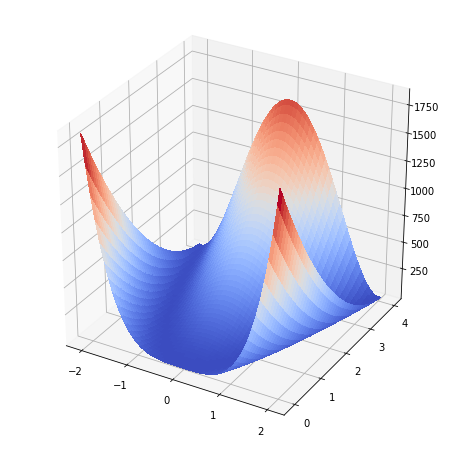

In [7]:
#
# Gráfica de la función
#
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection="3d")
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1, antialiased=False)
plt.show()

## Contorno de la función

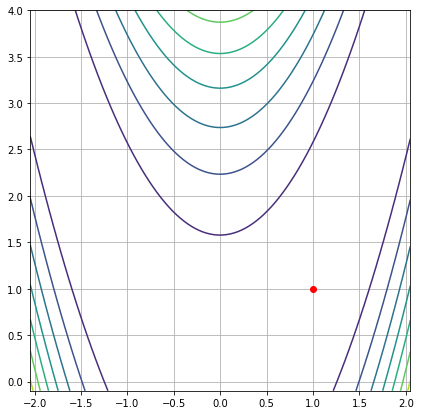

In [8]:
#
#  El punto rojo señala el punto de mínima
#  de la función
#
def plot_contour():
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect("equal", "box")
    ax.contour(X, Y, Z)
    ax.grid()
    plt.plot([1], [1], "o", color="red")


plot_contour()

## Pendiente entre dos puntos de una función

![pendiente](assets/pendiente.jpg)

La pendiente entre los puntos $x_k$ y $x_{k+1}$ es:

$$
\begin{split}
m & = \frac{y_{k+1} - y_k}{x_{k+1} - x_k} \\ \\
  & = \frac{f(x_{k+1}) - f(x_k)}{x_{k+1} - x_k} 
\end{split}
$$

Si se tiene en cuenta que $\Delta x = x_{k+1} - x_k$ y   $x_{k+1} = x_k + \Delta x$, entonces:

$$
\begin{split}
m & = \frac{f(x_{k+1}) - f(x_k)}{x_{k+1} - x_k} \\
  \\
  & = \frac{f(x_k + \Delta x) - f(x_k)}{\Delta x} \\
\end{split}
$$

## Concepto de derivada

Se obtiene al hacer $\Delta x$ tienda a cero. De esta forma, la línea roja se hace tangente a la función $f(x)$ en el punto $x_k$.

![derivada](assets/derivada.jpg)

En términos matemáticos:

$$
\frac{d}{dx} f(x_k) = \lim_{\Delta x \to 0} \frac{f(x_k + \Delta x) - f(x_k)}{\Delta x}
$$

y por tanto, la derivada es la pendiente de la recta tangente a $f(x)$ en el punto $x$.

## Signo de la derivada para distintas formas de f(x)

En la siguiente figura se consideran varias formas de $f(x)$ y se desea determinar el signo de la derivada en un punto $x$.

![dev4](assets/derivada-4-cuadrantes.jpg)

## Dirección de $x + \Delta x$ si $\Delta x$ tiene el mismo signo de la derivada 

Si a $x$ se le suma un valor $\Delta x$ que tiene el mismo signo de la derivada, $x$ se moverá en la dirección del crecimiento de la función. Este es el gradiente de la función.

![dev5](assets/direccion-gradiente.jpg)

## Método del gradiente descendente

Es un proceso iterativo en que el valor actual de $x$ se corrige sumandole un valor $\Delta x$ con signo contrario a la derivada (dirección de descenso), hasta alcanzar el punto de mínima.

La ecuación de corrección o mejora es:
$$
x_k = x_{k-1} - \mu \frac{d}{dx} f(x_{k-1})
$$
donde $\mu$ es la tasa o factor de aprendizaje.

![dev6](assets/gradiente-descendente.jpg)

## Minimización numérica usando el método del gradiente descendente

Para realizar la optimización numérica de la función $f(x, y)$ se utiliza el método del gradiente descendente. El proceso es iterativo, tal que a partir de un punto conocido $(x_{k-1}, y_{k-1})$ se obtiene un nuevo punto $(x_k, y_k)$ como:

$$ x_k = x_{k-1} - \mu \frac{\partial}{\partial x} f(x_{k-1}, y_{k-1})$$

$$ y_k = y_{k-1} - \mu \frac{\partial}{\partial y} f(x_{k-1}, y_{k-1})$$

donde $\mu$ se define como el tamaño de paso o coeficiente de aprendizaje o tasa de aprendizaje.


Si el punto $(x_k, y_k)$ se representa como el vector $\mathbf{w}_k = [x_k, y_k]'$, entonces las dos ecuaciones anteriores son equivalentes a:

$$\mathbf{w}_k = \mathbf{w}_{k-1} - \mu * \frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}_{k-1})$$ 


## Derivada de $f(x, y)$ respecto a $x$

$$
\begin{split}
    \frac{\partial}{\partial x} f(x, y) 
    & = \frac{\partial}{\partial x}
        \left[
            100 (x^2 - y)^2 + (1-x)^2
        \right] 
        \\ \\
    & = \frac{\partial}{\partial x} 
        \left[
            100 (x^2 - y)^2 
        \right] 
        + \frac{\partial}{\partial x}
        \left[
            (1-x)^2
        \right] 
        \\ \\
    & = 100 \cdot 2 \cdot (x^2 - y) \frac{\partial}{\partial x} 
            (x^2 - y)
        + 2 \cdot (1 - x)\frac{\partial}{\partial x}
            (1-x)
        \\ \\
    & = 100 \cdot 2 \cdot (x^2 - y) \frac{\partial}{\partial x} 
            (x^2)
        + 2 \cdot (1 - x)\frac{\partial}{\partial x}
            (-x)
        \\ \\
    & = 200 \cdot (x^2 - y) \cdot 2x 
        + 2 \cdot (1 - x) \cdot (-1)
        \\ \\
     & = 400 x (x^2 - y) - 2 (1- x) 
\end{split}
$$

## Derivada de $f(x, y)$ respecto a $y$

$$
\begin{split}
    \frac{\partial}{\partial y} f(x, y) 
    & = \frac{\partial}{\partial y}
        \left[
            100 (x^2 - y)^2 + (1-x)^2
        \right] 
        \\ \\
    & = \frac{\partial}{\partial y} 
        \left[
            100 (x^2 - y)^2 
        \right] 
        + \frac{\partial}{\partial y}
        \left[
            (1-x)^2
        \right] 
        \\ \\
    & = 100 \cdot 2 \cdot (x^2 - y) \frac{\partial}{\partial y} 
            (x^2 - y)
        + 2 \cdot (1 - x)\frac{\partial}{\partial y}
            (1-x)
        \\ \\
    & = -200 \cdot (x^2 - y) \frac{\partial}{\partial y} 
            (-y)
        + 2 \cdot (1 - x) \cdot 0
        \\ \\
    & = -200 \cdot (x^2 - y) 
\end{split}
$$

## Gradiente algebraico

El gradiente expresado en forma matricial sería:

$$\frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}) = 
\left[
  \begin{array}{c}
  400 x (x^2-y) - 2(1 - x)
  \\
  -200(x^2 - y)
  \end{array}
\right]
$$

De esta forma, la función que computa el gradiente se implementa como:

In [9]:
def g(x, y):
    gx = 400 * x * (x ** 2 - y) - 2 * (1 - x)
    gy = -200 * (x ** 2 - y)
    return (gx, gy)

## Proceso iterativo de mejora de los parámetros

A partir de las definiciones y cómputos anteriores, es posible implementar el proceso iterativo de mejora de los pesos usando la ecuación:

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}_{k-1})$$

In [10]:
def improve(x, y, mu):
    gx, gy = g(x, y)
    x = x - mu * gx
    y = y - mu * gy
    return (x, y)

## Rutina principal

Para realizar la optimización numérica se parte de un punto inicial de arranque. Para efectos ilustrativos se supondra que $x_0 = -0.5$ y $y_0 = 3.5$

-1.4364118140162858 2.0707793908964547 5.941728264678629


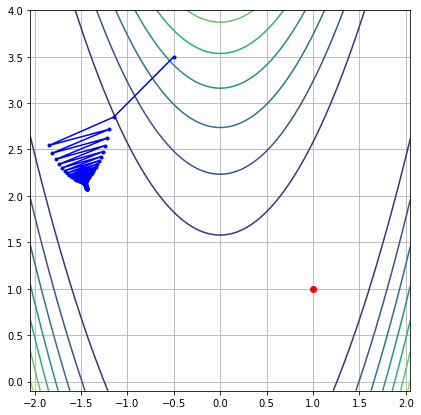

In [11]:
#
# Punto de inicio
#
x = -0.5
y = +3.5

#
#  almacena la historia de los puntos recorridos
#
history_x = [x]
history_y = [y]
history_f = [f(x, y)]

for epoch in range(100):
    x, y = improve(x, y, 0.001)
    history_x.append(x)
    history_y.append(y)
    history_f.append(f(x, y))

plot_contour()
plt.plot(history_x, history_y, ".-", color="blue")
print(x, y, f(x, y))

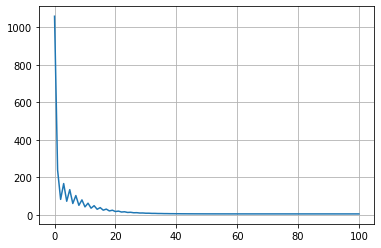

In [12]:
plt.plot(history_f, "-")
plt.grid()

Note que el algoritmo baja rápidamente al valle, y luego empieza a oscilar avanzando realmente muy poco.En las última iteraciones el gradiente es casi cero por lo que avanza aun más lentamente. Esto causa que hayan pocas ganancias en la minimización de la función, tal como se puede apreciar en la segunda gráfica. 

**Ejercicio.---** Cuántas iteraciones se requieren para llegar al punto de óptima: 1000, 2000, ...?